# Pytorch workflow
Letsexplore an example Pytorch end-to-end workflow

In [1]:
import torch
from torch import nn 
import matplotlib.pyplot as plt 

'1.12.1'

# 1. Data  preparing and loading

Data can be almost anything in machine learning
Videos, images, audio, DNA or text
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

We'll use a linear regression to make a straight line with known parameters

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1 
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias 
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test sets

Let's create a training and test set with our data

In [7]:
# Create a train / test split
train_split = int(0.8 * len(X))
train_split
X_train, y_train = X[: train_split], y[: train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

# Better visualize data

In [8]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None ):
    """
      Plots training data, test data and compares predictions
    """ 
    plt.figure(figsize=(10,7))

    # Plot training data in blue 
    plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

    # Plot test data in green 
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions 
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions") 

        # Show the legend 
        plt.legend(prop={"size": 14})


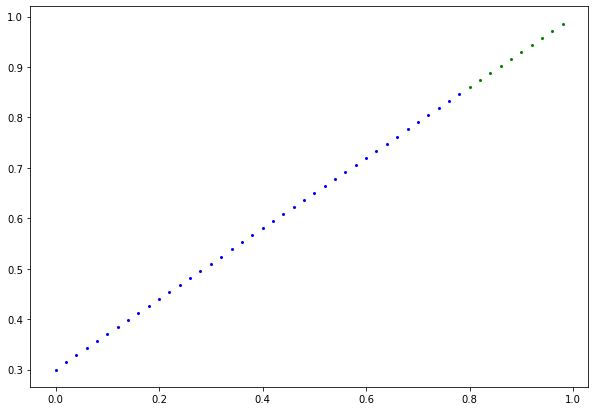

In [9]:
plot_predictions()

## 2. Build model
Our first Pytorch model
1. Gradient descent
2. Back propagation

In [16]:
# Create linear regression model 
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float ))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float ))   

    # Forward method to define the computation
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

### Pytorch model building essentials
* torch.nn - contains all of the building for computational graphs
* torch.nn.Parameter - what parameter should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent 
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation
 

### Checking the contents of our PyTorch model
Now we've created a model, let's see what's inside...
So we can check our parameters or what's inside our model `.parameters()`

In [19]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model ( this is a subclass of nn.Module )
model_0 = LinearRegressionModel()

# Check out the parameters
model_0.parameters()



<generator object Module.parameters at 0x7fd628970f90>

In [20]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [22]:
### Make predictions with model 
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds 

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

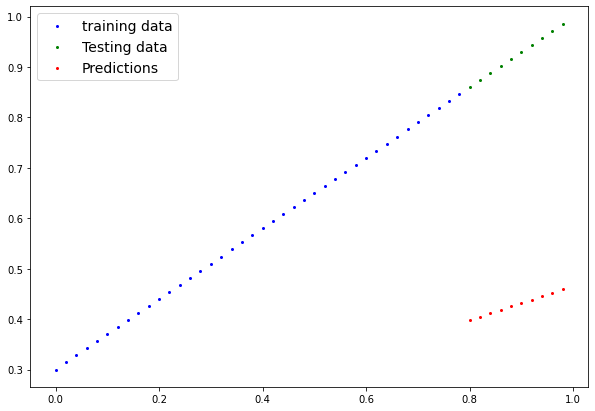

In [23]:
plot_predictions(predictions=y_preds)

## Train Model

Move from a poor representation of the data to a better representation

Measure how the poor the predictions are by using a loss function

* Loss function can also be called cost function or criterion in different areas 

* Loss function measures how wrong predictions are compared to ideal outputs
* Optimizer takes in account theloss of model and adjust the parameters

In [24]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [25]:
# Set up a loss function
loss_fn = nn.L1Loss()

# Set up an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)


## Building a traniing  loop
needed items
0. Loop through data 
1. Forward pass ( this involves data moving through)
2. Calculate loss
3. Optimizer zero grad
4. Loss backward
5. Optimizer step


In [39]:
# An epoch is one loop through the data 
epochs = 100

# 0. Loop through the data
for epoch in range(epochs):
# Set the model to training model
     model_0.train()

#1. Forward pass
     y_pred = model_0(X_train)

# 2. Calculate the loss
     loss = loss_fn(y_pred, y_train )
     print(f"Loss: { loss }")
# 3. Optimizer zero grad
     optimizer.zero_grad()

# 4.Perform backpropagation on the loss with respect to the parameters of the model
     loss.backward()

# 5. Step the optimizer
     optimizer.step() 

     model_0.eval() # turns off gradient tracking
with torch.inference_mode():
      test_pred = model_0(X_test)
      test_loss = loss_fn(test_pred, y_test)

      print(f"Epoch: { epoch } | Loss: { loss } | Test loss: { test_loss }" )
      print(model_0.state_dict())



Loss: 0.31288138031959534


TypeError: zero_grad() missing 1 required positional argument: 'self'

In [ ]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)